In [3]:
import numpy as np

def calculate_probabilities(parameters, data):
    # Extract parameters
    beta_01, beta_1, beta_2, beta_02, beta_03 = parameters.values()
    
    # Extract data
    X1, X2, Sero = data.values()
    
    # Calculate utilities for each alternative
    V1 = beta_01 + beta_1 * X1 + beta_2 * X2
    V2 = beta_02 + beta_1 * X1 + beta_2 * X2
    V3 = beta_03 + beta_1 * Sero + beta_2 * Sero
    
    # Calculate probabilities
    exp_V1 = np.exp(V1)
    exp_V2 = np.exp(V2)
    exp_V3 = np.exp(V3)
    
    denominator = exp_V1 + exp_V2 + exp_V3
    P1, P2, P3 = exp_V1 / denominator, exp_V2 / denominator, exp_V3 / denominator
    
    # Create a dictionary with probabilities
    probabilities = {'P1': P1, 'P2': P2, 'P3': P3}
    
    return probabilities

# Parameters and Data
parameters = {
    'beta01': 0.1,
    'beta1': 0.5,
    'beta2': 0.5,
    'beta02': 1,
    'beta03': 0
}

data = {
    'X1': np.array([2, 3, 5, 7, 1, 8, 4, 5, 6, 7]),
    'X2': np.array([1, 5, 3, 8, 2, 7, 5, 9, 4, 2]),
    'Sero': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

# Calculate probabilities
probabilities = calculate_probabilities(parameters, data)

print(probabilities)

# Save the output to a .txt file
with open('output.txt', 'w') as f:
    for key, value in probabilities.items():
        f.write(f'{key} = {value}\n')


{'P1': array([0.27311214, 0.28767245, 0.28767245, 0.28900869, 0.27311214,
       0.28900869, 0.2882131 , 0.28898158, 0.28854201, 0.2882131 ]), 'P2': array([0.67174747, 0.70756005, 0.70756005, 0.71084667, 0.67174747,
       0.71084667, 0.70888983, 0.71077998, 0.70969882, 0.70888983]), 'P3': array([0.05514039, 0.0047675 , 0.0047675 , 0.00014463, 0.05514039,
       0.00014463, 0.00289707, 0.00023844, 0.00175917, 0.00289707])}


Visualizations:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

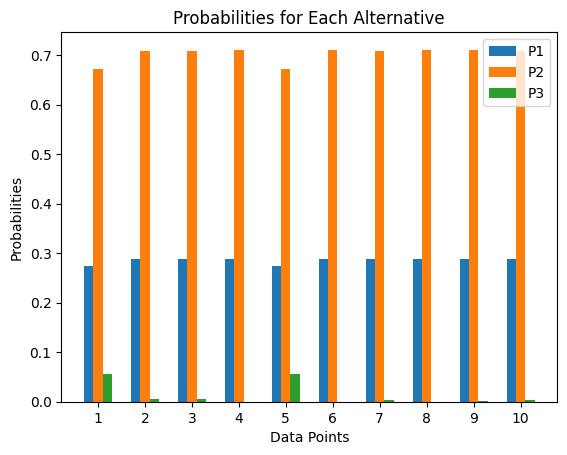

In [6]:
data_points = np.arange(len(data['X1']))
bar_width = 0.2

for i, (key, values) in enumerate(probabilities.items()):
    plt.bar(data_points + i * bar_width, values, bar_width, label=key)

plt.xlabel('Data Points')
plt.ylabel('Probabilities')
plt.title('Probabilities for Each Alternative')
plt.xticks(data_points + bar_width, [f'{i+1}' for i in range(len(data_points))])
plt.legend()

# Save the plot as an image
plt.savefig('probabilities_plot.png')

# Show the plot
plt.show()

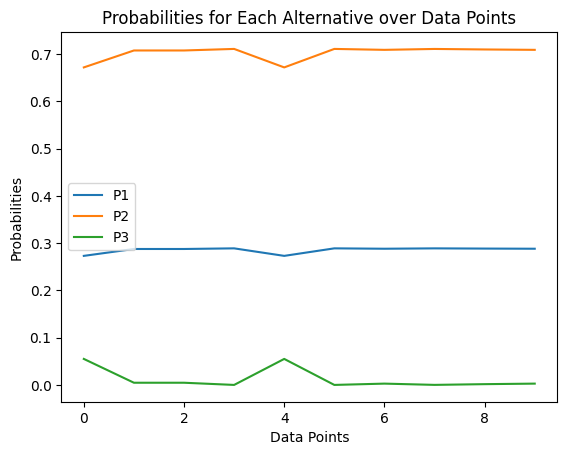

In [7]:
for key, values in probabilities.items():
    plt.plot(data_points, values, label=key)

plt.xlabel('Data Points')
plt.ylabel('Probabilities')
plt.title('Probabilities for Each Alternative over Data Points')
plt.legend()
plt.show()


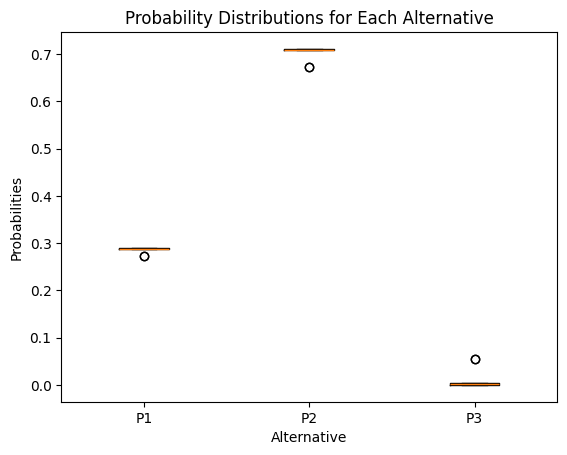

In [8]:
plt.boxplot([values for values in probabilities.values()], labels=list(probabilities.keys()))
plt.xlabel('Alternative')
plt.ylabel('Probabilities')
plt.title('Probability Distributions for Each Alternative')
plt.show()


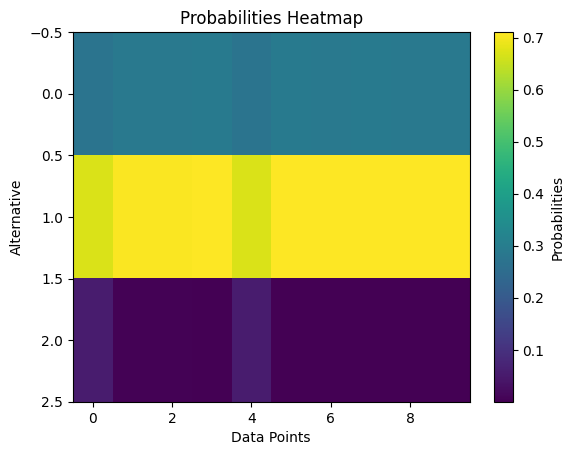

In [9]:
plt.imshow([list(values) for values in probabilities.values()], cmap='viridis', aspect='auto')
plt.colorbar(label='Probabilities')
plt.xlabel('Data Points')
plt.ylabel('Alternative')
plt.title('Probabilities Heatmap')
plt.show()


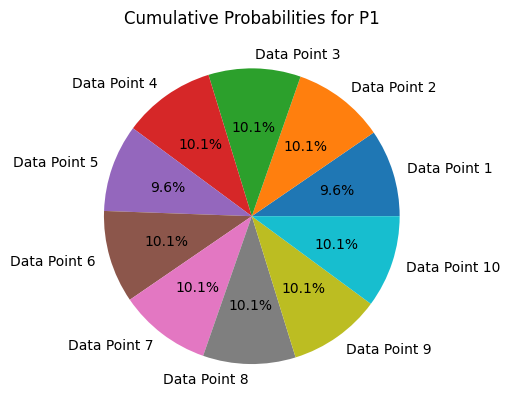

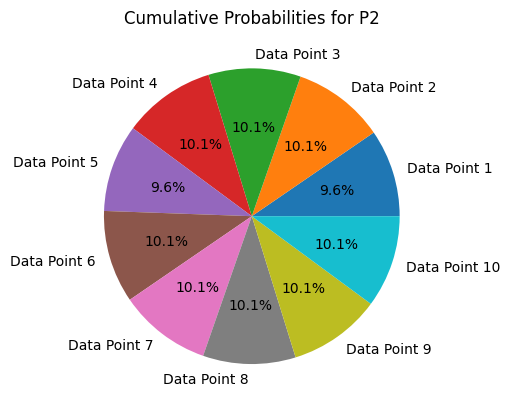

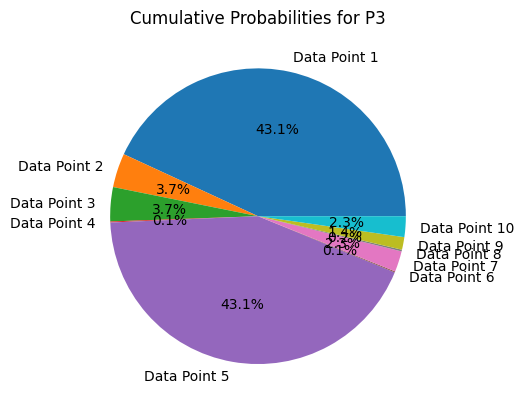

In [10]:
for key, values in probabilities.items():
    plt.pie(values, labels=[f'Data Point {i+1}' for i in range(len(data_points))], autopct='%1.1f%%')
    plt.title(f'Cumulative Probabilities for {key}')
    plt.show()
